# UserBasicClassifier
Un classificador básico con la matadata del usuario

In [2]:
import pandas as pd
import numpy as np

import os
import pickle

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
users = pd.read_pickle('trainDatasets/users_dataset.pkl')

In [4]:
users.head()

,id,screen_name,complete_name,description,verified,crawled_at,location,url,created_at,tweet_count,listed_count,favs_count,followers_count,following_count,bot,user_type
24858289,24858289,davideb66,Davide Bertoli,NaN,NaN,2014-04-19 14:46:19,NaN,NaN,Tue Mar 17 08:51:12 +0000 2009,1299,0,1,22,40,True,Spambot_1
33212890,33212890,ElisaDospina,Elisa D'Ospina,Autrice del libro #unavitatuttacurve dal 9 apr...,NaN,2014-05-18 23:20:58,Italy,http://t.co/ceK8TovxwI,Sun Apr 19 14:38:04 +0000 2009,18665,110,16358,12561,3442,True,Spambot_1
39773427,39773427,Vladimir65,Donato Vincenzo,[Live Long and Prosper],NaN,2014-05-13 23:21:54,"iPhone: 45.471680,9.192429",NaN,Wed May 13 15:34:41 +0000 2009,22987,6,14,600,755,True,Spambot_1
57007623,57007623,RafielaMorales,Rafiela Morales L.,"Cuasi Odontologa*♥,#Bipolar, #Sarcastica & Som...",NaN,2014-05-19 23:24:18,"ÜT: 18.4698712,-69.9327525",NaN,Wed Jul 15 12:55:03 +0000 2009,7975,2,11,398,350,True,Spambot_1
63258466,63258466,FabrizioC_c,§ h a † u r♄,"I shall rise from my own death, to avenge hers...",NaN,2014-05-11 23:22:23,Firenze,http://t.co/PK5F0JDKcy,Wed Aug 05 21:12:49 +0000 2009,20218,8,162,413,405,True,Spambot_1


In [12]:
def transform_x(df):
    df.loc[:, 'crawled_at'] = pd.DatetimeIndex(pd.to_datetime(df.crawled_at, utc=None)).tz_convert(tz='UTC')
    df.loc[:, 'created_at'] = pd.DatetimeIndex(pd.to_datetime(df.created_at, utc=None)).tz_convert(tz='UTC')
    account_life = df.crawled_at - df.created_at
    account_life_meses = np.round(account_life.dt.days / 30)
    account_life_meses = account_life_meses.replace(0, 1)
    account_life_semanas = np.round(account_life.dt.days / 7)
    account_life_semanas = account_life_semanas.replace(0, 1)
    numValues = ['tweet_count', 'listed_count', 'favs_count', 'followers_count', 'following_count']
    for i in numValues:
        colName_mes = i+'_mes'
        df.loc[:,colName_mes] = df[i] / account_life_meses

        colName_semana = i+'_semana'
        df.loc[:,colName_semana] = df[i] / account_life_semanas

    df.loc[:,'verified'] = ~df.verified.isna()
    df.loc[:,'description'] = ~df.description.isna()
    df.loc[:,'location'] = ~df.location.isna()
    df.loc[:,'url'] = ~df.url.isna()

    columnas = np.concatenate(
        [[x, x+'_mes', x+'_semana'] for x in numValues]
    )
    columnas = np.concatenate([
        [
            'verified',
            'description',
            'location',
            'url',
        ],
        columnas
    ])
    df = df[columnas]
    df = df.fillna(0)
    return df
    
#     def fit(self, x, y=0):
#         return self
#     def transform(self, x, y=0):
#         x = self.getVars(x)
#         return x
#     def fit_transform(self, x, y=0):
#         x = self.getVars(x)
#         return x

In [13]:
pipeline = Pipeline([
#     ('scaler', StandardScaler()),
    ('cat', CatBoostClassifier())
])

le = preprocessing.LabelEncoder()
x = transform_x(users)
y =  le.fit_transform(users['bot'])

X_train, X_test, y_train, y_test = train_test_split(x, y)

pipeline.fit(X_train, y_train)

Learning rate set to 0.028192
0:	learn: 0.6328401	total: 97.3ms	remaining: 1m 37s
1:	learn: 0.5727993	total: 134ms	remaining: 1m 7s
2:	learn: 0.5267652	total: 169ms	remaining: 56.1s
3:	learn: 0.4772100	total: 208ms	remaining: 51.8s
4:	learn: 0.4434902	total: 229ms	remaining: 45.5s
5:	learn: 0.4104332	total: 262ms	remaining: 43.5s
6:	learn: 0.3818364	total: 296ms	remaining: 42s
7:	learn: 0.3496557	total: 330ms	remaining: 40.9s
8:	learn: 0.3262932	total: 365ms	remaining: 40.2s
9:	learn: 0.3016870	total: 411ms	remaining: 40.7s
10:	learn: 0.2819870	total: 446ms	remaining: 40.1s
11:	learn: 0.2585493	total: 484ms	remaining: 39.9s
12:	learn: 0.2445290	total: 540ms	remaining: 41s
13:	learn: 0.2294121	total: 592ms	remaining: 41.7s
14:	learn: 0.2145578	total: 643ms	remaining: 42.2s
15:	learn: 0.2018290	total: 676ms	remaining: 41.6s
16:	learn: 0.1904382	total: 710ms	remaining: 41.1s
17:	learn: 0.1776964	total: 742ms	remaining: 40.5s
18:	learn: 0.1654006	total: 775ms	remaining: 40s
19:	learn: 0.15

162:	learn: 0.0392942	total: 5.88s	remaining: 30.2s
163:	learn: 0.0392658	total: 5.92s	remaining: 30.2s
164:	learn: 0.0391963	total: 5.95s	remaining: 30.1s
165:	learn: 0.0391324	total: 5.97s	remaining: 30s
166:	learn: 0.0390703	total: 6.01s	remaining: 30s
167:	learn: 0.0389883	total: 6.04s	remaining: 29.9s
168:	learn: 0.0389435	total: 6.08s	remaining: 29.9s
169:	learn: 0.0388633	total: 6.11s	remaining: 29.8s
170:	learn: 0.0388301	total: 6.14s	remaining: 29.8s
171:	learn: 0.0387817	total: 6.17s	remaining: 29.7s
172:	learn: 0.0387310	total: 6.2s	remaining: 29.7s
173:	learn: 0.0385720	total: 6.24s	remaining: 29.6s
174:	learn: 0.0384230	total: 6.28s	remaining: 29.6s
175:	learn: 0.0383165	total: 6.31s	remaining: 29.6s
176:	learn: 0.0382537	total: 6.35s	remaining: 29.5s
177:	learn: 0.0381316	total: 6.38s	remaining: 29.5s
178:	learn: 0.0380361	total: 6.42s	remaining: 29.4s
179:	learn: 0.0379869	total: 6.46s	remaining: 29.4s
180:	learn: 0.0379412	total: 6.49s	remaining: 29.4s
181:	learn: 0.037

325:	learn: 0.0311002	total: 11.4s	remaining: 23.5s
326:	learn: 0.0310847	total: 11.4s	remaining: 23.5s
327:	learn: 0.0310670	total: 11.4s	remaining: 23.4s
328:	learn: 0.0310470	total: 11.5s	remaining: 23.4s
329:	learn: 0.0310283	total: 11.5s	remaining: 23.4s
330:	learn: 0.0309024	total: 11.6s	remaining: 23.4s
331:	learn: 0.0307995	total: 11.6s	remaining: 23.3s
332:	learn: 0.0307681	total: 11.6s	remaining: 23.3s
333:	learn: 0.0307022	total: 11.7s	remaining: 23.3s
334:	learn: 0.0306797	total: 11.7s	remaining: 23.2s
335:	learn: 0.0306273	total: 11.7s	remaining: 23.2s
336:	learn: 0.0306204	total: 11.8s	remaining: 23.2s
337:	learn: 0.0306027	total: 11.8s	remaining: 23.1s
338:	learn: 0.0305371	total: 11.9s	remaining: 23.1s
339:	learn: 0.0305338	total: 11.9s	remaining: 23.1s
340:	learn: 0.0304782	total: 11.9s	remaining: 23.1s
341:	learn: 0.0304428	total: 12s	remaining: 23s
342:	learn: 0.0304182	total: 12s	remaining: 23s
343:	learn: 0.0303924	total: 12s	remaining: 23s
344:	learn: 0.0303513	to

485:	learn: 0.0260612	total: 16.8s	remaining: 17.7s
486:	learn: 0.0260518	total: 16.8s	remaining: 17.7s
487:	learn: 0.0260277	total: 16.8s	remaining: 17.7s
488:	learn: 0.0260165	total: 16.9s	remaining: 17.6s
489:	learn: 0.0260130	total: 16.9s	remaining: 17.6s
490:	learn: 0.0260072	total: 16.9s	remaining: 17.6s
491:	learn: 0.0259868	total: 17s	remaining: 17.5s
492:	learn: 0.0259631	total: 17s	remaining: 17.5s
493:	learn: 0.0259542	total: 17s	remaining: 17.4s
494:	learn: 0.0259311	total: 17.1s	remaining: 17.4s
495:	learn: 0.0259129	total: 17.1s	remaining: 17.4s
496:	learn: 0.0258891	total: 17.1s	remaining: 17.3s
497:	learn: 0.0258778	total: 17.2s	remaining: 17.3s
498:	learn: 0.0258374	total: 17.2s	remaining: 17.3s
499:	learn: 0.0258333	total: 17.2s	remaining: 17.2s
500:	learn: 0.0258227	total: 17.3s	remaining: 17.2s
501:	learn: 0.0257691	total: 17.3s	remaining: 17.1s
502:	learn: 0.0257473	total: 17.3s	remaining: 17.1s
503:	learn: 0.0257396	total: 17.4s	remaining: 17.1s
504:	learn: 0.0256

648:	learn: 0.0229132	total: 22s	remaining: 11.9s
649:	learn: 0.0229070	total: 22.1s	remaining: 11.9s
650:	learn: 0.0229041	total: 22.1s	remaining: 11.8s
651:	learn: 0.0228900	total: 22.1s	remaining: 11.8s
652:	learn: 0.0228836	total: 22.2s	remaining: 11.8s
653:	learn: 0.0228646	total: 22.2s	remaining: 11.7s
654:	learn: 0.0228577	total: 22.2s	remaining: 11.7s
655:	learn: 0.0228216	total: 22.3s	remaining: 11.7s
656:	learn: 0.0228212	total: 22.3s	remaining: 11.6s
657:	learn: 0.0228108	total: 22.3s	remaining: 11.6s
658:	learn: 0.0228001	total: 22.4s	remaining: 11.6s
659:	learn: 0.0227784	total: 22.4s	remaining: 11.5s
660:	learn: 0.0227644	total: 22.4s	remaining: 11.5s
661:	learn: 0.0227151	total: 22.5s	remaining: 11.5s
662:	learn: 0.0226863	total: 22.5s	remaining: 11.4s
663:	learn: 0.0226850	total: 22.5s	remaining: 11.4s
664:	learn: 0.0226637	total: 22.6s	remaining: 11.4s
665:	learn: 0.0225977	total: 22.6s	remaining: 11.3s
666:	learn: 0.0225779	total: 22.6s	remaining: 11.3s
667:	learn: 0.

810:	learn: 0.0204862	total: 27.3s	remaining: 6.36s
811:	learn: 0.0204833	total: 27.3s	remaining: 6.32s
812:	learn: 0.0204615	total: 27.3s	remaining: 6.29s
813:	learn: 0.0204562	total: 27.4s	remaining: 6.25s
814:	learn: 0.0204421	total: 27.4s	remaining: 6.22s
815:	learn: 0.0204232	total: 27.4s	remaining: 6.19s
816:	learn: 0.0204226	total: 27.5s	remaining: 6.16s
817:	learn: 0.0204216	total: 27.5s	remaining: 6.12s
818:	learn: 0.0204202	total: 27.5s	remaining: 6.08s
819:	learn: 0.0204086	total: 27.6s	remaining: 6.05s
820:	learn: 0.0204022	total: 27.6s	remaining: 6.01s
821:	learn: 0.0204006	total: 27.6s	remaining: 5.98s
822:	learn: 0.0203996	total: 27.7s	remaining: 5.95s
823:	learn: 0.0203971	total: 27.7s	remaining: 5.91s
824:	learn: 0.0203919	total: 27.7s	remaining: 5.88s
825:	learn: 0.0203894	total: 27.8s	remaining: 5.85s
826:	learn: 0.0203835	total: 27.8s	remaining: 5.81s
827:	learn: 0.0203796	total: 27.8s	remaining: 5.78s
828:	learn: 0.0203674	total: 27.9s	remaining: 5.75s
829:	learn: 

971:	learn: 0.0182969	total: 32.5s	remaining: 936ms
972:	learn: 0.0182956	total: 32.5s	remaining: 903ms
973:	learn: 0.0182788	total: 32.6s	remaining: 869ms
974:	learn: 0.0182787	total: 32.6s	remaining: 836ms
975:	learn: 0.0182771	total: 32.6s	remaining: 802ms
976:	learn: 0.0182744	total: 32.7s	remaining: 769ms
977:	learn: 0.0182704	total: 32.7s	remaining: 735ms
978:	learn: 0.0182395	total: 32.7s	remaining: 702ms
979:	learn: 0.0182376	total: 32.8s	remaining: 669ms
980:	learn: 0.0182321	total: 32.8s	remaining: 635ms
981:	learn: 0.0182255	total: 32.8s	remaining: 602ms
982:	learn: 0.0182227	total: 32.9s	remaining: 568ms
983:	learn: 0.0181981	total: 32.9s	remaining: 535ms
984:	learn: 0.0181938	total: 32.9s	remaining: 501ms
985:	learn: 0.0181503	total: 33s	remaining: 468ms
986:	learn: 0.0181500	total: 33s	remaining: 434ms
987:	learn: 0.0181466	total: 33s	remaining: 401ms
988:	learn: 0.0181465	total: 33s	remaining: 367ms
989:	learn: 0.0181011	total: 33.1s	remaining: 334ms
990:	learn: 0.018095

Pipeline(memory=None,
     steps=[('cat', <catboost.core.CatBoostClassifier object at 0x00000207A1A6EEF0>)])

El valor del AUC es:  0.9969005847953215


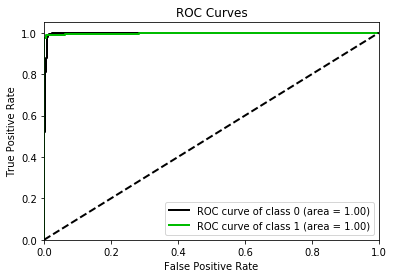

In [14]:
y_predicted_cat = pipeline.predict_proba(X_test)
y_pred = pipeline.predict(X_test)

from sklearn.metrics import roc_auc_score
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)
from scikitplot.metrics import plot_roc
%matplotlib inline
plot_roc(y_test,y_predicted_cat, plot_micro = False, plot_macro= False)

In [15]:
# Matriz de Confusión
conf = confusion_matrix(y_test, y_pred)
predicted_cols = ['pred_'+str(c) for c in le.classes_]
display(pd.DataFrame(conf, index= ['real_Human','real_Bot'],columns = ['pred_Human','pred_Bot']))
print(classification_report(y_test, y_pred))

,pred_Human,pred_Bot
real_Human,894,6
real_Bot,16,1181


             precision    recall  f1-score   support

          0       0.98      0.99      0.99       900
          1       0.99      0.99      0.99      1197

avg / total       0.99      0.99      0.99      2097



In [16]:
# Re-Entrenar con el dataset completo
modelo = pipeline.fit(transform_x(users), y)

Learning rate set to 0.030584
0:	learn: 0.6348643	total: 42ms	remaining: 42s
1:	learn: 0.5733449	total: 80ms	remaining: 39.9s
2:	learn: 0.5064176	total: 118ms	remaining: 39.3s
3:	learn: 0.4564297	total: 160ms	remaining: 39.8s
4:	learn: 0.4134687	total: 196ms	remaining: 39.1s
5:	learn: 0.3807268	total: 238ms	remaining: 39.5s
6:	learn: 0.3511693	total: 278ms	remaining: 39.4s
7:	learn: 0.3218304	total: 315ms	remaining: 39s
8:	learn: 0.2978874	total: 357ms	remaining: 39.3s
9:	learn: 0.2765191	total: 394ms	remaining: 39s
10:	learn: 0.2567451	total: 435ms	remaining: 39.1s
11:	learn: 0.2384914	total: 472ms	remaining: 38.9s
12:	learn: 0.2213619	total: 508ms	remaining: 38.6s
13:	learn: 0.2028968	total: 552ms	remaining: 38.9s
14:	learn: 0.1912025	total: 589ms	remaining: 38.7s
15:	learn: 0.1791562	total: 631ms	remaining: 38.8s
16:	learn: 0.1686129	total: 667ms	remaining: 38.6s
17:	learn: 0.1592113	total: 705ms	remaining: 38.5s
18:	learn: 0.1515628	total: 745ms	remaining: 38.5s
19:	learn: 0.143612

163:	learn: 0.0406915	total: 6.33s	remaining: 32.3s
164:	learn: 0.0406374	total: 6.37s	remaining: 32.2s
165:	learn: 0.0405763	total: 6.41s	remaining: 32.2s
166:	learn: 0.0404666	total: 6.44s	remaining: 32.1s
167:	learn: 0.0404406	total: 6.48s	remaining: 32.1s
168:	learn: 0.0403979	total: 6.52s	remaining: 32s
169:	learn: 0.0403393	total: 6.55s	remaining: 32s
170:	learn: 0.0403005	total: 6.59s	remaining: 32s
171:	learn: 0.0401743	total: 6.63s	remaining: 31.9s
172:	learn: 0.0400758	total: 6.67s	remaining: 31.9s
173:	learn: 0.0399747	total: 6.71s	remaining: 31.9s
174:	learn: 0.0399501	total: 6.74s	remaining: 31.8s
175:	learn: 0.0398966	total: 6.78s	remaining: 31.7s
176:	learn: 0.0397614	total: 6.81s	remaining: 31.7s
177:	learn: 0.0396641	total: 6.85s	remaining: 31.6s
178:	learn: 0.0396529	total: 6.87s	remaining: 31.5s
179:	learn: 0.0396015	total: 6.91s	remaining: 31.5s
180:	learn: 0.0395422	total: 6.95s	remaining: 31.4s
181:	learn: 0.0394452	total: 6.99s	remaining: 31.4s
182:	learn: 0.0394

322:	learn: 0.0336185	total: 12.2s	remaining: 25.6s
323:	learn: 0.0335370	total: 12.3s	remaining: 25.6s
324:	learn: 0.0335085	total: 12.3s	remaining: 25.5s
325:	learn: 0.0334255	total: 12.3s	remaining: 25.5s
326:	learn: 0.0333746	total: 12.4s	remaining: 25.5s
327:	learn: 0.0333522	total: 12.4s	remaining: 25.4s
328:	learn: 0.0333413	total: 12.5s	remaining: 25.4s
329:	learn: 0.0333383	total: 12.5s	remaining: 25.3s
330:	learn: 0.0332282	total: 12.5s	remaining: 25.3s
331:	learn: 0.0332227	total: 12.6s	remaining: 25.3s
332:	learn: 0.0332017	total: 12.6s	remaining: 25.2s
333:	learn: 0.0331647	total: 12.6s	remaining: 25.2s
334:	learn: 0.0331428	total: 12.7s	remaining: 25.1s
335:	learn: 0.0331132	total: 12.7s	remaining: 25.1s
336:	learn: 0.0330701	total: 12.7s	remaining: 25.1s
337:	learn: 0.0330391	total: 12.8s	remaining: 25s
338:	learn: 0.0330324	total: 12.8s	remaining: 25s
339:	learn: 0.0330181	total: 12.9s	remaining: 24.9s
340:	learn: 0.0329753	total: 12.9s	remaining: 24.9s
341:	learn: 0.03

481:	learn: 0.0294568	total: 18.1s	remaining: 19.5s
482:	learn: 0.0294430	total: 18.1s	remaining: 19.4s
483:	learn: 0.0294359	total: 18.2s	remaining: 19.4s
484:	learn: 0.0294263	total: 18.2s	remaining: 19.3s
485:	learn: 0.0294168	total: 18.3s	remaining: 19.3s
486:	learn: 0.0294016	total: 18.3s	remaining: 19.3s
487:	learn: 0.0293131	total: 18.3s	remaining: 19.2s
488:	learn: 0.0293121	total: 18.4s	remaining: 19.2s
489:	learn: 0.0293044	total: 18.4s	remaining: 19.2s
490:	learn: 0.0292936	total: 18.4s	remaining: 19.1s
491:	learn: 0.0292359	total: 18.5s	remaining: 19.1s
492:	learn: 0.0292283	total: 18.5s	remaining: 19.1s
493:	learn: 0.0292186	total: 18.6s	remaining: 19s
494:	learn: 0.0292097	total: 18.6s	remaining: 19s
495:	learn: 0.0292052	total: 18.6s	remaining: 18.9s
496:	learn: 0.0292045	total: 18.7s	remaining: 18.9s
497:	learn: 0.0292021	total: 18.7s	remaining: 18.9s
498:	learn: 0.0291875	total: 18.8s	remaining: 18.8s
499:	learn: 0.0291870	total: 18.8s	remaining: 18.8s
500:	learn: 0.02

640:	learn: 0.0268911	total: 23.8s	remaining: 13.3s
641:	learn: 0.0268405	total: 23.8s	remaining: 13.3s
642:	learn: 0.0268056	total: 23.9s	remaining: 13.3s
643:	learn: 0.0267969	total: 23.9s	remaining: 13.2s
644:	learn: 0.0267604	total: 23.9s	remaining: 13.2s
645:	learn: 0.0267537	total: 24s	remaining: 13.1s
646:	learn: 0.0267529	total: 24s	remaining: 13.1s
647:	learn: 0.0267478	total: 24s	remaining: 13.1s
648:	learn: 0.0267464	total: 24.1s	remaining: 13s
649:	learn: 0.0267452	total: 24.1s	remaining: 13s
650:	learn: 0.0267338	total: 24.1s	remaining: 12.9s
651:	learn: 0.0266735	total: 24.2s	remaining: 12.9s
652:	learn: 0.0266469	total: 24.2s	remaining: 12.9s
653:	learn: 0.0266274	total: 24.3s	remaining: 12.8s
654:	learn: 0.0265940	total: 24.3s	remaining: 12.8s
655:	learn: 0.0265857	total: 24.3s	remaining: 12.8s
656:	learn: 0.0265840	total: 24.4s	remaining: 12.7s
657:	learn: 0.0265301	total: 24.4s	remaining: 12.7s
658:	learn: 0.0264789	total: 24.4s	remaining: 12.6s
659:	learn: 0.0264390	

804:	learn: 0.0241172	total: 29.7s	remaining: 7.18s
805:	learn: 0.0241156	total: 29.7s	remaining: 7.15s
806:	learn: 0.0241129	total: 29.8s	remaining: 7.12s
807:	learn: 0.0241034	total: 29.8s	remaining: 7.08s
808:	learn: 0.0240944	total: 29.8s	remaining: 7.05s
809:	learn: 0.0240814	total: 29.9s	remaining: 7.01s
810:	learn: 0.0240577	total: 29.9s	remaining: 6.98s
811:	learn: 0.0240576	total: 30s	remaining: 6.94s
812:	learn: 0.0240528	total: 30s	remaining: 6.9s
813:	learn: 0.0240230	total: 30s	remaining: 6.87s
814:	learn: 0.0240208	total: 30.1s	remaining: 6.83s
815:	learn: 0.0240150	total: 30.1s	remaining: 6.79s
816:	learn: 0.0240128	total: 30.2s	remaining: 6.75s
817:	learn: 0.0240030	total: 30.2s	remaining: 6.72s
818:	learn: 0.0240025	total: 30.2s	remaining: 6.68s
819:	learn: 0.0239934	total: 30.3s	remaining: 6.64s
820:	learn: 0.0239920	total: 30.3s	remaining: 6.6s
821:	learn: 0.0239736	total: 30.3s	remaining: 6.57s
822:	learn: 0.0239734	total: 30.3s	remaining: 6.53s
823:	learn: 0.023971

967:	learn: 0.0224594	total: 35.5s	remaining: 1.17s
968:	learn: 0.0224329	total: 35.6s	remaining: 1.14s
969:	learn: 0.0224321	total: 35.6s	remaining: 1.1s
970:	learn: 0.0224310	total: 35.6s	remaining: 1.06s
971:	learn: 0.0224252	total: 35.7s	remaining: 1.03s
972:	learn: 0.0224249	total: 35.7s	remaining: 990ms
973:	learn: 0.0224245	total: 35.7s	remaining: 954ms
974:	learn: 0.0224200	total: 35.8s	remaining: 917ms
975:	learn: 0.0223459	total: 35.8s	remaining: 880ms
976:	learn: 0.0223426	total: 35.8s	remaining: 844ms
977:	learn: 0.0223424	total: 35.9s	remaining: 807ms
978:	learn: 0.0223402	total: 35.9s	remaining: 770ms
979:	learn: 0.0223395	total: 35.9s	remaining: 733ms
980:	learn: 0.0223368	total: 36s	remaining: 697ms
981:	learn: 0.0223338	total: 36s	remaining: 660ms
982:	learn: 0.0223157	total: 36s	remaining: 623ms
983:	learn: 0.0223090	total: 36.1s	remaining: 587ms
984:	learn: 0.0223090	total: 36.1s	remaining: 550ms
985:	learn: 0.0223029	total: 36.1s	remaining: 513ms
986:	learn: 0.02230

In [17]:
# Exportar Modelo a archivo binario
filename = 'modelPipeline.pkl'
with open(filename, 'wb') as twModel:
    pickle.dump(modelo, twModel)